In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches



In [32]:
# Initialize Fibonacci sequence
fibonacci_first_number = 0
fibonacci_second_number = 1

# Simulate Fibonacci sequence until a given number
fibonacci_limit = 233  # Total spirals (89 + 144)

while fibonacci_first_number + fibonacci_second_number <= fibonacci_limit:
    # Calculate the next Fibonacci number
    fibonacci_new_number = fibonacci_first_number + fibonacci_second_number
    
    # Update the sequence
    fibonacci_first_number = fibonacci_second_number
    fibonacci_second_number = fibonacci_new_number
    
    # Print the current Fibonacci number
    print(f"The new Fibonacci number is {fibonacci_new_number}")


The new Fibonacci number is 1
The new Fibonacci number is 2
The new Fibonacci number is 3
The new Fibonacci number is 5
The new Fibonacci number is 8
The new Fibonacci number is 13
The new Fibonacci number is 21
The new Fibonacci number is 34
The new Fibonacci number is 55
The new Fibonacci number is 89
The new Fibonacci number is 144
The new Fibonacci number is 233


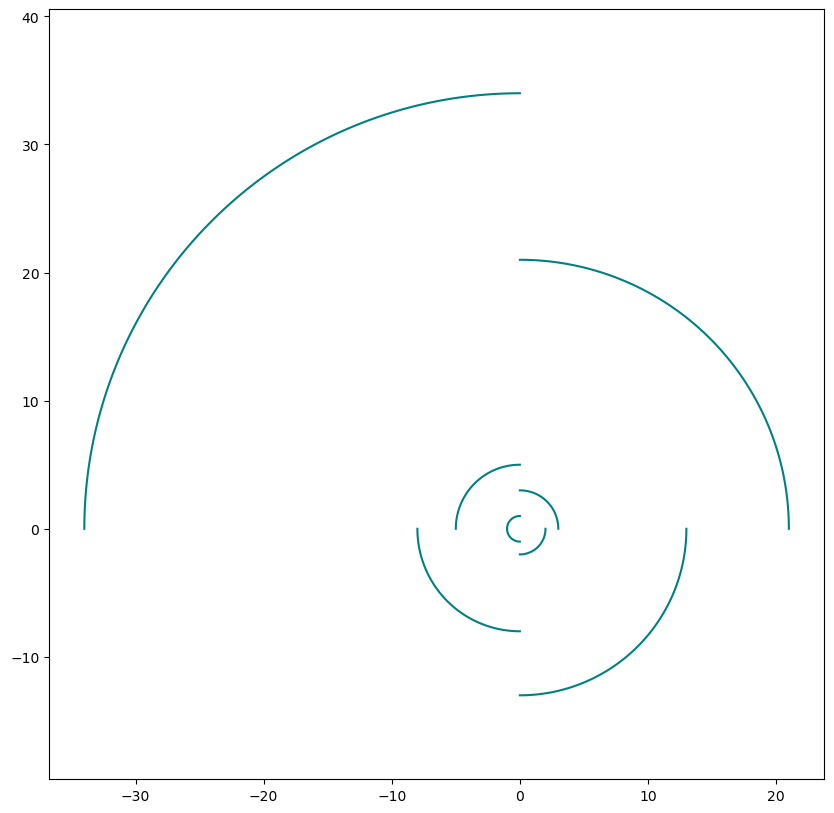

In [33]:


# Generate Fibonacci numbers
def fibonacci(n):
    fib = [0, 1]
    for i in range(2, n):
        fib.append(fib[-1] + fib[-2])
    return fib

# Plot Fibonacci spiral
def fibonacci_spiral(n):
    fib = fibonacci(n)
    plt.figure(figsize=(10, 10))
    angle = 0
    for radius in fib:
        theta = np.linspace(angle, angle + np.pi/2, 100)
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        plt.plot(x, y, color='teal')
        angle += np.pi / 2
    plt.axis('equal')
    plt.show()

# Run the function
fibonacci_spiral(10)

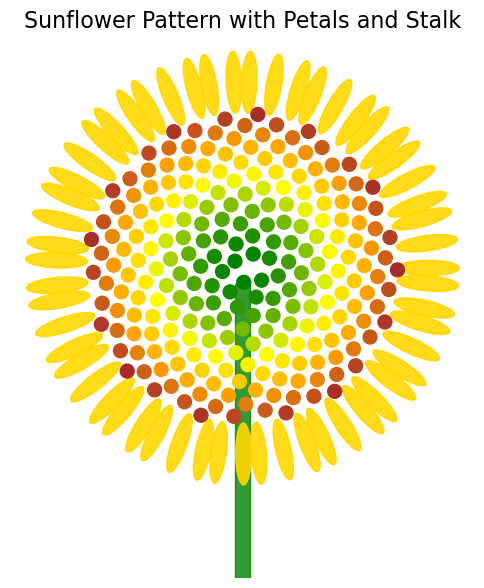

In [34]:

#Define a custom sunflower colourmap for transitioning colours of Fibonacci spiral of seeds
sunflower_colors = LinearSegmentedColormap.from_list(
    "sunflower", ["green", "yellow", "orange", "brown"]
)

# Generate Fibonacci spiral points
def sunflower_spiral(n):
    golden_angle = np.pi * (3 - np.sqrt(5))  #Approximately 137.5 degrees
    # - the angle used in nature to space sunflower seeds for optimal packing
    radii = np.sqrt(np.arange(1, n + 1)) #Arange function in numpy generates evenly spaced values within range 
    #Sq root function for seeds to follow natural outward growth - gradual spacing
    angles = np.arange(1, n + 1) * golden_angle #Each seed rotates by the golden angle to 
    # mimic natural spiral pattern
    #Cartesian coordinates - Converts polar coordinates (𝑟, 𝜃) to Cartesian coordinates (𝑥, 𝑦) for plotting:
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return x, y, angles, radii #Returns arrays of x and y positions, angles, and radii

def add_sunflower_petals(ax, num_petals, max_radius): #Adds elliptical petals around sunflower
    #(An ellipse is a closed curve that resembles a flattened circle)
    golden_angle = np.pi * (3 - np.sqrt(5))
    petal_length = max_radius * 0.4 #Length: 40% of sunflower's maximum radius
    petal_width = max_radius * 0.1 #Width: 10% of sunflower's maximum radius

    for i in range(num_petals): #Number of petals is set to 55 - a Fibonacci number
        angle = i * golden_angle # Ensures even spacing
        x = (max_radius + petal_length * 0.5) * np.cos(angle) #Petals are placed outside of sunflower's core
        y = (max_radius + petal_length * 0.5) * np.sin(angle)

        petal = patches.Ellipse( #Matplolib function to draw ellipse-shape petals at each calculated (x, y)
            (x, y), 
            petal_length, #The major axis
            petal_width, #The minor axis
            angle=np.degrees(angle), #Angle rotates the petal along with Fibonacci spiral
            color="gold", 
            alpha=0.9 #Slighty transparent for a natural look
        )
        ax.add_patch(petal) #Adds the petals to the plot

def add_sunflower_stalk(ax, max_radius):
    stalk_height = max_radius * 3 #Define's stalk's height as 3 * sunflower radius
    stalk_width = max_radius * 0.1 #Stalk width is set to 10% of sunflower radius

    stalk = patches.Rectangle(  #Create stalk
        (-stalk_width / 2, -stalk_height - max_radius * 0.1), #Position stalk below sunflower
        stalk_width, stalk_height,
        color="green", 
        alpha=0.8, 
        zorder=1 #Ensures stalk is in correct place
        )
    
    ax.add_patch(stalk) #Adds stalk to the plot

def plot_sunflower(n): #Generate the sunflower seed positions using Fibonacci spirals
    x, y, angles, radii = sunflower_spiral(n)
    max_radius = max(radii) #Stores the largest radius for later scaling

    #Create the plot
    fig, ax = plt.subplots(figsize=(6, 9)) #Figure size to fit both sunflower and stalk
    ax.set_xlim(-max_radius * 1.5, max_radius * 1.5) #x and y limits
    ax.set_ylim(-max_radius * 2, max_radius * 1.5)

    add_sunflower_stalk(ax, max_radius) #Calls function to draw stalk

    add_sunflower_petals(ax, num_petals=55, max_radius=max_radius) #Calls function to draw petals
 
    ax.scatter(x, y, c=np.arange(n), cmap=sunflower_colors, ##Scatter plots sunflower seeds with custom sunflower colourmap 
            s=100, #Makes seeds visible
            zorder=2) #Ensures seeds appear above the stalk

    ax.set_aspect('equal') #Ensures sunflower is not distorted
    ax.axis('off') #Removes axes for cleaner look
    plt.title("Sunflower Pattern with Petals and Stalk", fontsize=16)
    plt.show()

# Plot with approximately 233 seeds - a Fibonacci number that aligns with natural sunflower growth
plot_sunflower(233)


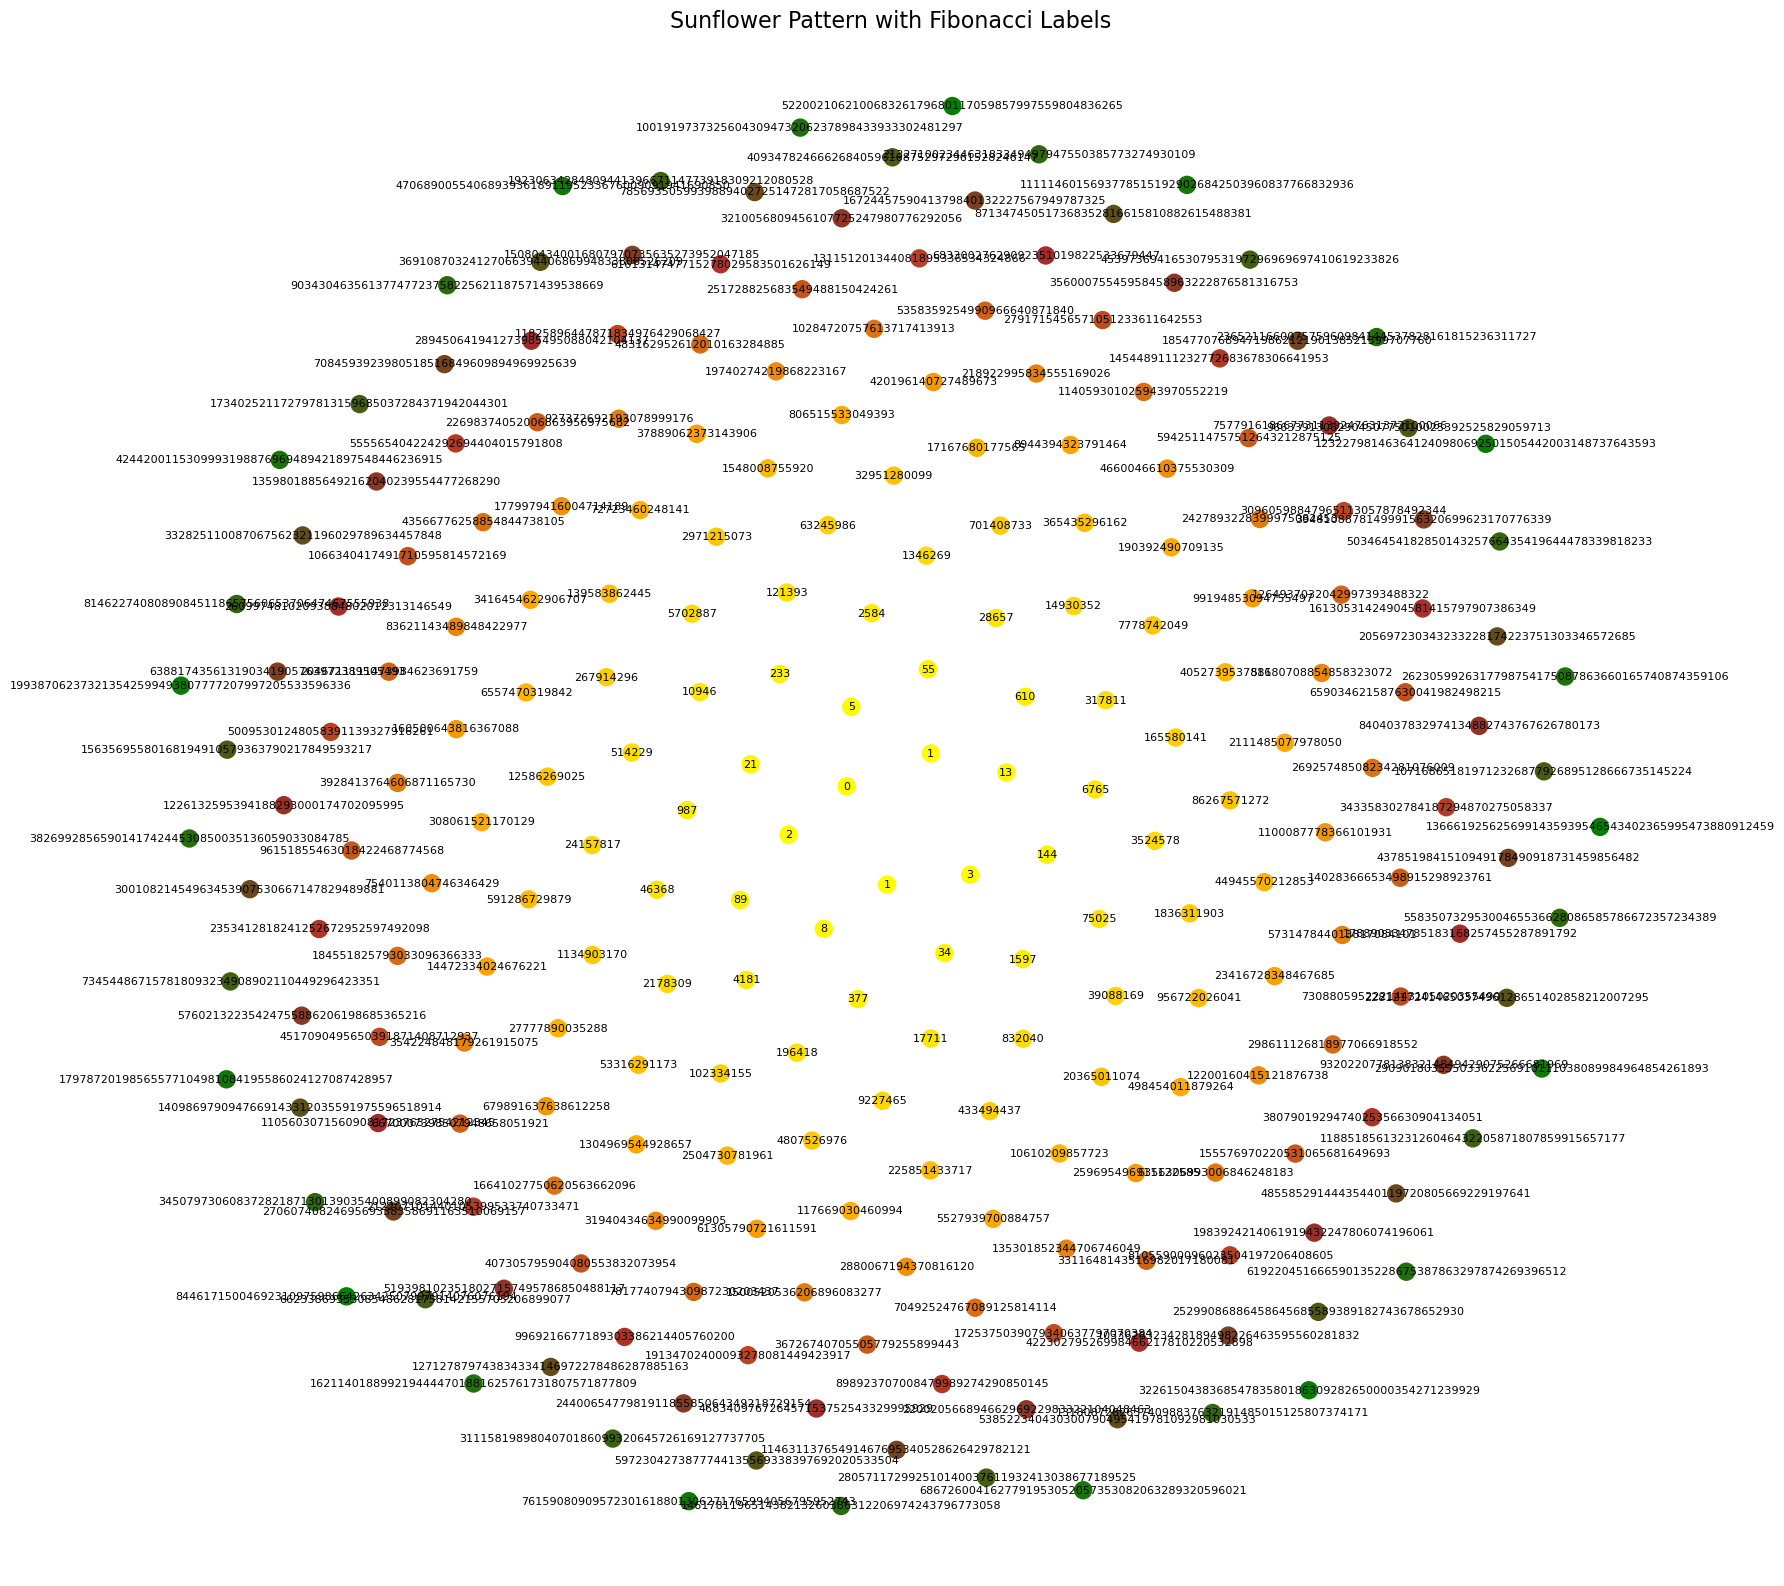

In [35]:

# Generate Fibonacci sequence
def generate_fibonacci(n): #n represents number of points to generate in spiral
    fibonacci_sequence = [0, 1] #Golden angle in radians - approx. 137.5 degrees.
    #Determines spacing of points in spiral
    for _ in range(2, n):
        fibonacci_sequence.append(fibonacci_sequence[-1] + fibonacci_sequence[-2])
    return fibonacci_sequence[:n]


def sunflower_spiral(n):
    golden_angle = np.pi * (3 - np.sqrt(5)) #Golden angle in radians - the angle used in nature
    #to space sunflower seeds for optimal packing
    radii = np.sqrt(np.arange(1, n + 1))  #Use square root via array of radii for gradual spacing
    # of points from centre, creating spiral effect
    angles = np.arange(1, n + 1) * golden_angle #Generates an array of angles by multiplying golden
    # angle by integers from 1 to 'n'. Each point in spiral will be placed at angles
    x = radii * np.cos(angles) #Cartesian coordinates (x and y coordinates of spiral: cosine and sine)
    y = radii * np.sin(angles)
    return x, y #Returns coordinates as two separate arrays


def plot_sunflower_with_labels(n):
    fibonacci_sequence = generate_fibonacci(n)
    x, y = sunflower_spiral(n)
                      
    sunflower_colors = LinearSegmentedColormap.from_list( #Creates custom colour map using from_list method
    "sunflower", ["yellow", "orange", "brown", "green"] # this conveys transition of colour points in sunflower
)


# Plot the sunflower spiral
    plt.figure(figsize=(20, 20)) #Initialises new figure for plotting with specified size: 10 inches * 10 inches
    plt.scatter(x, y, 
                c=np.arange(n), #Assigns colour to each point based on its index 
                cmap=sunflower_colors, #Uses previously defined colourmap for colouring the points
                s=150, #Sets size of each point in scatter plot
                label="Seeds"
               ) 

    for i in range(n):
        plt.text(
            x[i], 
            y[i], 
            str(fibonacci_sequence[i]), 
            fontsize=8, 
            color="black",
            ha="center",
            va="center"
            )

    plt.axis('equal') #Scaling of the x and y axis is equal, thus 
                      #ensuring that the spiral appears correctly proportioned
    plt.axis('off')
    plt.title("Sunflower Pattern with Fibonacci Labels", fontsize=16)
    plt.show()

# Run the function
plot_sunflower_with_labels(233) #generates the plot with 'n' set to 233


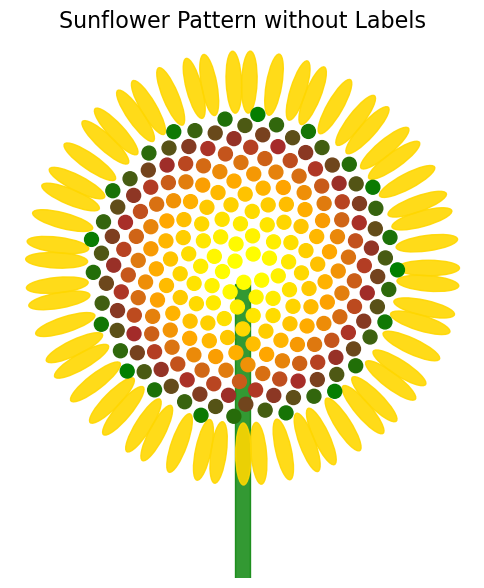

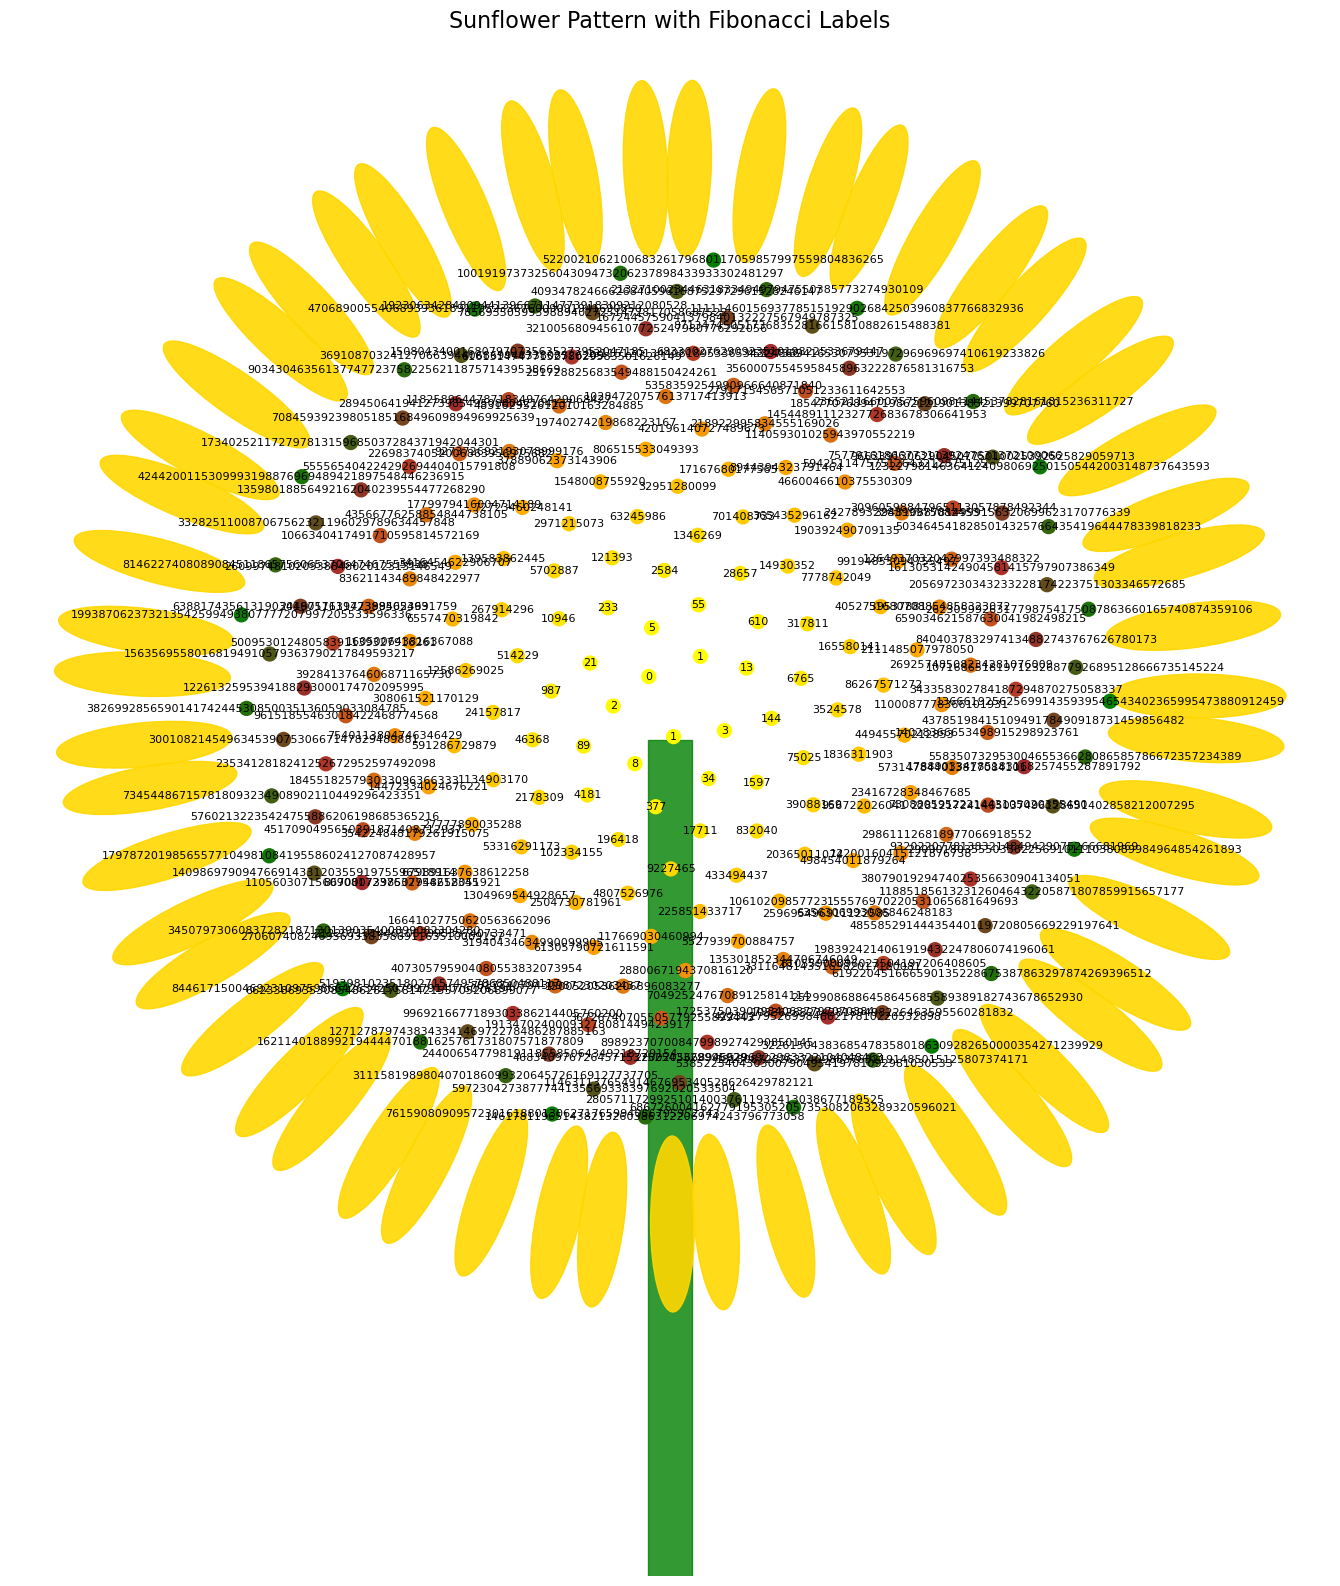

In [36]:

#Define a custom sunflower colourmap for transitioning colours of Fibonacci spiral of seeds
sunflower_colors = LinearSegmentedColormap.from_list(
    "sunflower", ["yellow", "orange", "brown", "green"]
)

# Generate Fibonacci sequence
def generate_fibonacci(n): #n represents number of points to generate in spiral
    fibonacci_sequence = [0, 1] #Golden angle in radians - approx. 137.5 degrees.
    #Determines spacing of points in spiral:
    for _ in range(2, n):
        fibonacci_sequence.append(fibonacci_sequence[-1] + fibonacci_sequence[-2])
    return fibonacci_sequence[:n]

# Generate Fibonacci spiral points
def sunflower_spiral(n):
    golden_angle = np.pi * (3 - np.sqrt(5))  #Approximately 137.5 degrees
    # - the angle used in nature to space sunflower seeds for optimal packing
    radii = np.sqrt(np.arange(1, n + 1)) #Arange function in numpy generates evenly spaced values within range 
    #Sq root function for seeds to follow natural outward growth - gradual spacing
    angles = np.arange(1, n + 1) * golden_angle #Each seed rotates by the golden angle to 
    # mimic natural spiral pattern
    #Cartesian coordinates - Converts polar coordinates (𝑟, 𝜃) to Cartesian coordinates (𝑥, 𝑦) for plotting:
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return x, y, angles, radii #Returns arrays of x and y positions, angles, and radii

def add_sunflower_petals(ax, num_petals, max_radius): #Adds elliptical petals around sunflower
    #(An ellipse is a closed curve that resembles a flattened circle)
    golden_angle = np.pi * (3 - np.sqrt(5))
    petal_length = max_radius * 0.4 #Length: 40% of sunflowers max radius
    petal_width = max_radius * 0.1 #Width: 10% of sunflowers max radius

    for i in range(num_petals): #Number of petals is set to 55 - a Fibonacci number
        angle = i * golden_angle # Ensures even spacing
        x = (max_radius + petal_length * 0.5) * np.cos(angle) #Petals are placed outside of sunflower's core
        y = (max_radius + petal_length * 0.5) * np.sin(angle)

        petal = patches.Ellipse( #Matplolib function to draw ellipse-shape petals at each calculated (x, y)
            (x, y), 
            petal_length, #The major axis
            petal_width, #The minor axis
            angle=np.degrees(angle), #Angle rotates the petal along with Fibonacci spiral
            color="gold", 
            alpha=0.9 #Slighty transparent for a natural look
        )
        ax.add_patch(petal) #Adds the petals to the plot

def add_sunflower_stalk(ax, max_radius):
    stalk_height = max_radius * 3 #Define's stalk's height as 3 * sunflower radius
    stalk_width = max_radius * 0.1 #Stalk width is set to 10% of sunflower radius

    stalk = patches.Rectangle(  #Create stalk
        (-stalk_width / 2, -stalk_height - max_radius * 0.1), #Position stalk below sunflower
        stalk_width, stalk_height,
        color="green", 
        alpha=0.8, 
        zorder=1 #Ensures stalk is in correct place
        )
    
    ax.add_patch(stalk) #Adds stalk to the plot

# Plot sunflower without Fibonacci labels
def plot_sunflower(n): #Generate the sunflower seed positions using Fibonacci spirals
    x, y, angles, radii = sunflower_spiral(n)
    max_radius = max(radii) #Stores the largest radius for later scaling

    #Create the plot
    fig, ax = plt.subplots(figsize=(6, 9)) #Figure size to fit both sunflower and stalk
    ax.set_xlim(-max_radius * 1.5, max_radius * 1.5) #x and y limits
    ax.set_ylim(-max_radius * 2, max_radius * 1.5)

    add_sunflower_stalk(ax, max_radius) #Calls function to draw stalk
    add_sunflower_petals(ax, num_petals=55, max_radius=max_radius) #Calls function to draw petals
 
    ## catter plots sunflower seeds with custom sunflower colourmap
    ax.scatter(x, y, 
               c=np.arange(n), 
               cmap=sunflower_colors, 
               s=100, #Makes seeds visible
               zorder=2 #Ensures seeds appear above the stalk
              ) 

    ax.set_aspect('equal') #Ensures sunflower is not distorted
    ax.axis('off') #Removes axes for cleaner look
    plt.title("Sunflower Pattern without Labels", fontsize=16)
    plt.show()

# Plot sunflower with Fionacci labels
def plot_sunflower_with_labels(n): #Generate the sunflower seed positions and accompanying labels using Fibonacci spirals
    fibonacci_sequence = generate_fibonacci(n)
    x, y, angles, radii = sunflower_spiral(n) 
    max_radius = max(radii) #Stores the largest radius for later scaling

    fig, ax = plt.subplots(figsize=(20, 20)) #Figure size to fit both sunflower and stalk
    ax.set_xlim(-max_radius * 1.5, max_radius * 1.5) #x and y limits
    ax.set_ylim(-max_radius * 2, max_radius * 1.5)

    add_sunflower_stalk(ax, max_radius) #Calls function to draw stalk
    add_sunflower_petals(ax, num_petals=55, max_radius=max_radius) #Calls function to draw petals
 
    scatter = ax.scatter(x, y, 
            c=np.arange(n), 
            cmap=sunflower_colors, ##Scatter plots sunflower seeds with custom sunflower colourmap 
            s=100, #Makes seeds visible
            zorder=2 #Ensures seeds appear above the stalk
           )

    for i in range(n): #labels (each number in Fibonacci sequence)
        ax.text(
            x[i], 
            y[i], 
            str(fibonacci_sequence[i]), 
            fontsize=8, 
            color="black",
            ha="center",
            va="center"
            )

    ax.set_aspect('equal') #Scaling of the x and y axis is equal, thus 
                      #ensuring that the spiral appears correctly proportioned
    plt.axis('off')
    plt.title("Sunflower Pattern with Fibonacci Labels", fontsize=16)
    plt.show()

# Plot both versions with approximately 233 seeds - a Fibonacci number that aligns with natural sunflower growth
plot_sunflower(233)
plot_sunflower_with_labels(233)
